In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

from scipy import stats

In [3]:
buldy_RGG_100_rep100_073 = pd.read_csv('Raw_data/Processed/proc_buldy_RGG_100_rep100_073.csv')

del buldy_RGG_100_rep100_073['Unnamed: 0']

In [5]:
buldy_RGG_100_rep100_073

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step15_far_dead_node,step16_isol,step16_unsupp,step16_far_dead_node,step17_isol,step17_unsupp,step17_far_dead_node,step18_isol,step18_unsupp,step18_far_dead_node
0,1,0.073,1970.5,500.0,1386.5,1761.5,750,10,40,3,...,0.0,0,0,0.0,0,0,0.0,0,0,0
1,1,0.073,1970.5,500.0,1.0,3.0,4,337,459,10,...,0.0,0,0,0.0,0,0,0.0,0,0,0
2,1,0.073,1970.5,500.0,1117.5,1496.5,758,4,38,3,...,0.0,0,0,0.0,0,0,0.0,0,0,0
3,1,0.073,1970.5,500.0,798.5,1115.5,634,8,158,4,...,0.0,0,0,0.0,0,0,0.0,0,0,0
4,2,0.073,1966.0,500.0,1206.0,1535.0,658,54,88,7,...,0.0,0,0,0.0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,99,0.073,1963.5,500.0,782.5,1098.5,632,4,164,4,...,0.0,0,0,0.0,0,0,0.0,0,0,0
396,100,0.073,1944.0,500.0,548.0,720.0,344,221,235,7,...,0.0,0,0,0.0,0,0,0.0,0,0,0
397,100,0.073,1944.0,500.0,1.0,3.0,4,365,431,9,...,0.0,0,0,0.0,0,0,0.0,0,0,0
398,100,0.073,1944.0,500.0,1096.0,1474.0,756,1,43,3,...,0.0,0,0,0.0,0,0,0.0,0,0,0


In [6]:
buldy_RGG_100_rep100_073_rgg_rgg_data = buldy_RGG_100_rep100_073.copy()
buldy_RGG_100_rep100_073_rgg_rand_data = buldy_RGG_100_rep100_073.copy()
buldy_RGG_100_rep100_073_rand_rgg_data = buldy_RGG_100_rep100_073.copy()
buldy_RGG_100_rep100_073_rand_rand_data = buldy_RGG_100_rep100_073.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(400):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_100_rep100_073_rgg_rgg_data = buldy_RGG_100_rep100_073_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_100_rep100_073_rgg_rand_data = buldy_RGG_100_rep100_073_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_100_rep100_073_rand_rgg_data = buldy_RGG_100_rep100_073_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_100_rep100_073_rand_rand_data = buldy_RGG_100_rep100_073_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_100_rep100_073_rgg_rgg_data = buldy_RGG_100_rep100_073_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_100_rep100_073_rgg_rand_data = buldy_RGG_100_rep100_073_rgg_rand_data.reset_index(drop=True)
buldy_RGG_100_rep100_073_rand_rgg_data = buldy_RGG_100_rep100_073_rand_rgg_data.reset_index(drop=True)
buldy_RGG_100_rep100_073_rand_rand_data = buldy_RGG_100_rep100_073_rand_rand_data.reset_index(drop=True)

In [7]:
buldy_RGG_100_rep100_073_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step15_far_dead_node,step16_isol,step16_unsupp,step16_far_dead_node,step17_isol,step17_unsupp,step17_far_dead_node,step18_isol,step18_unsupp,step18_far_dead_node
0,1,0.073,1970.5,500.0,1386.5,1761.5,750,10,40,3,...,0.0,0,0,0.0,0,0,0.0,0,0,0
1,2,0.073,1966.0,500.0,1206.0,1535.0,658,54,88,7,...,0.0,0,0,0.0,0,0,0.0,0,0,0
2,3,0.073,1919.0,500.0,1355.5,1740.5,770,0,30,2,...,0.0,0,0,0.0,0,0,0.0,0,0,0
3,4,0.073,1967.5,500.0,1390.5,1770.5,760,3,37,4,...,0.0,0,0,0.0,0,0,0.0,0,0,0
4,5,0.073,1930.5,500.0,1333.0,1698.0,730,19,51,5,...,0.0,0,0,0.0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.073,1917.5,500.0,1328.0,1706.0,756,1,43,4,...,0.0,0,0,0.0,0,0,0.0,0,0,0
96,97,0.073,2002.0,500.0,890.5,1145.5,510,135,155,9,...,0.0,0,0,0.0,0,0,0.0,0,0,0
97,98,0.073,1989.5,500.0,1340.0,1698.0,716,10,74,3,...,0.0,0,0,0.0,0,0,0.0,0,0,0
98,99,0.073,1963.5,500.0,1346.5,1714.5,736,11,53,7,...,0.0,0,0,0.0,0,0,0.0,0,0,0


# Data Dividing Done




# -----------------------------------------------------------------------------------------------





# Plotting Starts

## buldy_RGG_100_rep100_073

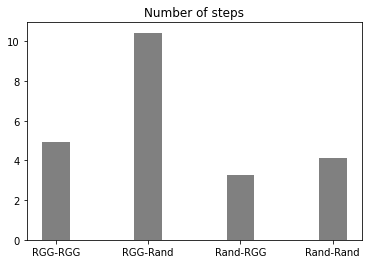

In [10]:
step_nums = []
step_nums.append(statistics.mean(buldy_RGG_100_rep100_073_rgg_rgg_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_100_rep100_073_rgg_rand_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_100_rep100_073_rand_rgg_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_100_rep100_073_rand_rand_data['cas_steps'].values.tolist()))

index = np.arange(4)
graph_types = ['RGG-RGG', 'RGG-Rand', 'Rand-RGG', 'Rand-Rand']

plt.bar(index, step_nums, width=0.3, color='gray')
plt.xticks(index, graph_types)
plt.title('Number of steps')
plt.savefig('The number of steps_new.png')
plt.show()

In [11]:
rgg_rgg_isol = []
rgg_rgg_unsupp = []
rgg_rand_isol = []
rgg_rand_unsupp = []
rand_rgg_isol = []
rand_rgg_unsupp = []
rand_rand_isol = []
rand_rand_unsupp =[]

In [12]:
index = 1
for col_name in buldy_RGG_100_rep100_073_rgg_rgg_data:
    if col_name == ('step%d_isol' % index):
        rgg_rgg_isol.append(statistics.mean(buldy_RGG_100_rep100_073_rgg_rgg_data[col_name].values.tolist()))
    if col_name == ('step%d_unsupp' % index):
        rgg_rgg_unsupp.append(statistics.mean(buldy_RGG_100_rep100_073_rgg_rgg_data[col_name].values.tolist()))
        index += 1
        
index = 1
for col_name in buldy_RGG_100_rep100_073_rgg_rand_data:
    if col_name == ('step%d_isol' % index):
        rgg_rand_isol.append(statistics.mean(buldy_RGG_100_rep100_073_rgg_rand_data[col_name].values.tolist()))
    if col_name == ('step%d_unsupp' % index):
        rgg_rand_unsupp.append(statistics.mean(buldy_RGG_100_rep100_073_rgg_rand_data[col_name].values.tolist()))
        index += 1
        
index = 1
for col_name in buldy_RGG_100_rep100_073_rand_rgg_data:
    if col_name == ('step%d_isol' % index):
        rand_rgg_isol.append(statistics.mean(buldy_RGG_100_rep100_073_rand_rgg_data[col_name].values.tolist()))
    if col_name == ('step%d_unsupp' % index):
        rand_rgg_unsupp.append(statistics.mean(buldy_RGG_100_rep100_073_rand_rgg_data[col_name].values.tolist()))
        index += 1
        
index = 1
for col_name in buldy_RGG_100_rep100_073_rand_rand_data:
    if col_name == ('step%d_isol' % index):
        rand_rand_isol.append(statistics.mean(buldy_RGG_100_rep100_073_rand_rand_data[col_name].values.tolist()))
    if col_name == ('step%d_unsupp' % index):
        rand_rand_unsupp.append(statistics.mean(buldy_RGG_100_rep100_073_rand_rand_data[col_name].values.tolist()))
        index += 1

In [13]:
print(len(rgg_rgg_isol))
print(len(rgg_rgg_unsupp))
print(len(rgg_rand_isol))
print(len(rgg_rand_unsupp))
print(len(rand_rgg_isol))
print(len(rand_rgg_unsupp))
print(len(rand_rand_isol))
print(len(rand_rand_unsupp))

18
18
18
18
18
18
18
18


In [14]:
cum_rgg_rgg_isol = []
cum_rgg_rgg_unsupp = []
cum_rgg_rand_isol = []
cum_rgg_rand_unsupp = []
cum_rand_rgg_isol = []
cum_rand_rgg_unsupp = []
cum_rand_rand_isol = []
cum_rand_rand_unsupp = []

total = []
for i in range(len(rgg_rgg_isol)):
    if i == 0:
        total.append(rgg_rgg_isol[i])
        total.append(rgg_rgg_unsupp[i])
    else:
        total[0] += rgg_rgg_isol[i]
        total[1] += rgg_rgg_unsupp[i]
    cum_rgg_rgg_isol.append(total[0])
    cum_rgg_rgg_unsupp.append(total[1])
    
total = []
for i in range(len(rgg_rand_isol)):
    if i == 0:
        total.append(rgg_rand_isol[i])
        total.append(rgg_rand_unsupp[i])
    else:
        total[0] += rgg_rand_isol[i]
        total[1] += rgg_rand_unsupp[i]
    cum_rgg_rand_isol.append(total[0])
    cum_rgg_rand_unsupp.append(total[1])
    
total = []
for i in range(len(rand_rgg_isol)):
    if i == 0:
        total.append(rand_rgg_isol[i])
        total.append(rand_rgg_unsupp[i])
    else:
        total[0] += rand_rgg_isol[i]
        total[1] += rand_rgg_unsupp[i]
    cum_rand_rgg_isol.append(total[0])
    cum_rand_rgg_unsupp.append(total[1])
    
total = []
for i in range(len(rand_rand_isol)):
    if i == 0:
        total.append(rand_rand_isol[i])
        total.append(rand_rand_unsupp[i])
    else:
        total[0] += rand_rand_isol[i]
        total[1] += rand_rand_unsupp[i]
    cum_rand_rand_isol.append(total[0])
    cum_rand_rand_unsupp.append(total[1])

## Isolation vs Unsupport

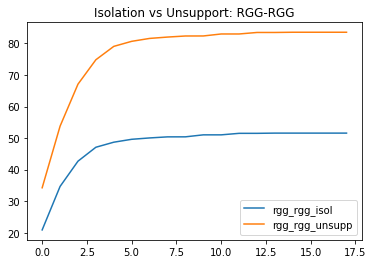

In [15]:
plt.plot(range(len(cum_rgg_rgg_isol)), cum_rgg_rgg_isol)
plt.plot(range(len(cum_rgg_rgg_isol)), cum_rgg_rgg_unsupp)
plt.legend(['rgg_rgg_isol','rgg_rgg_unsupp'])
plt.title('Isolation vs Unsupport: RGG-RGG')
plt.savefig('Isolation vs Unsupport_RGG-RGG.png')
plt.show()

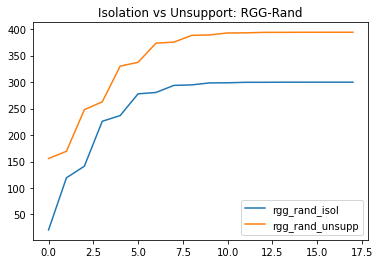

In [16]:
plt.plot(range(len(cum_rgg_rand_isol)), cum_rgg_rand_isol)
plt.plot(range(len(cum_rgg_rand_isol)), cum_rgg_rand_unsupp)
plt.legend(['rgg_rand_isol','rgg_rand_unsupp'])
plt.title('Isolation vs Unsupport: RGG-Rand')
plt.savefig('Isolation vs Unsupport_RGG-Rand.png')
plt.show()

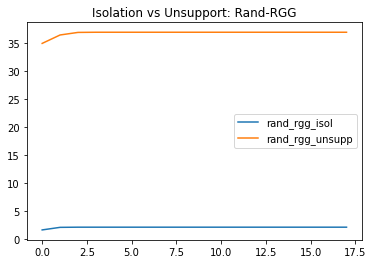

In [17]:
plt.plot(range(len(cum_rand_rgg_isol)), cum_rand_rgg_isol)
plt.plot(range(len(cum_rand_rgg_isol)), cum_rand_rgg_unsupp)
plt.legend(['rand_rgg_isol','rand_rgg_unsupp'])
plt.title('Isolation vs Unsupport: Rand-RGG')
plt.savefig('Isolation vs Unsupport_Rand-RGG.png')
plt.show()

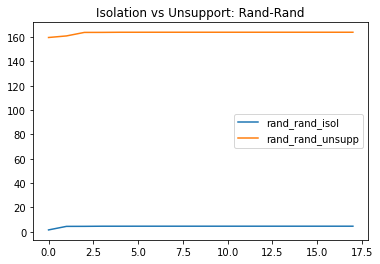

In [18]:
plt.plot(range(len(cum_rand_rand_isol)), cum_rand_rand_isol)
plt.plot(range(len(cum_rand_rand_isol)), cum_rand_rand_unsupp)
plt.legend(['rand_rand_isol','rand_rand_unsupp'])
plt.title('Isolation vs Unsupport: Rand-Rand')
plt.savefig('Isolation vs Unsupport_Rand-Rand.png')
plt.show()

In [19]:
df_len = []

df_len.append(list(rgg_rgg_isol))
df_len.append(list(rgg_rand_isol))
df_len.append(list(rand_rgg_isol))
df_len.append(list(rand_rand_isol))

max_df_len = max(df_len, key=len)

x_val = list(range(len(max_df_len)))

In [20]:
proc_isol = []
proc_unsupp = []

proc_isol.append(cum_rgg_rgg_isol)
proc_isol.append(cum_rgg_rand_isol)
proc_isol.append(cum_rand_rgg_isol)
proc_isol.append(cum_rand_rand_isol)

proc_unsupp.append(cum_rgg_rgg_unsupp)
proc_unsupp.append(cum_rgg_rand_unsupp)
proc_unsupp.append(cum_rand_rgg_unsupp)
proc_unsupp.append(cum_rand_rand_unsupp)

for x in x_val:
    if len(rgg_rgg_isol) <= x:
        proc_isol[0].append(cum_rgg_rgg_isol[len(rgg_rgg_isol) - 1])
        proc_unsupp[0].append(cum_rgg_rgg_unsupp[len(rgg_rgg_isol) - 1])
    if len(rgg_rand_isol) <= x:
        proc_isol[1].append(cum_rgg_rand_isol[len(rgg_rand_isol) - 1])
        proc_unsupp[1].append(cum_rgg_rand_unsupp[len(rgg_rand_isol) - 1])
    if len(rand_rgg_isol) <= x:
        proc_isol[2].append(cum_rand_rgg_isol[len(rand_rgg_isol) - 1])
        proc_unsupp[2].append(cum_rand_rgg_unsupp[len(rand_rgg_isol) - 1])
    if len(rand_rand_isol) <= x:
        proc_isol[3].append(cum_rand_rand_isol[len(rand_rand_isol) - 1])
        proc_unsupp[3].append(cum_rand_rand_unsupp[len(rand_rand_isol) - 1])

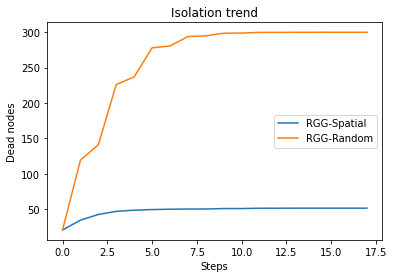

In [26]:
plt.plot(x_val, proc_isol[0])
plt.plot(x_val, proc_isol[1])
plt.legend(['RGG-Spatial','RGG-Random'])
plt.title('Isolation trend')
plt.ylabel('Dead nodes')
plt.xlabel('Steps')
plt.savefig('intra_rgg_isolation_new.png')
plt.show()

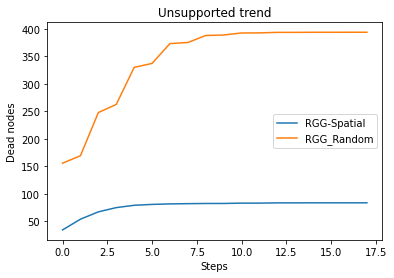

In [27]:
plt.plot(x_val, proc_unsupp[0])
plt.plot(x_val, proc_unsupp[1])
plt.legend(['RGG-Spatial','RGG_Random'])
plt.title('Unsupported trend')
plt.ylabel('Dead nodes')
plt.xlabel('Steps')
plt.savefig('intra_rgg_unsupp_trend_new')
plt.show()

## Pie Chart

In [28]:
init_death = 150
labels = ['Alive nodes', 'Initial death', 'Dead nodes from isolation', 'Dead nodes from unsupport']

alive = []
alive.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['alive_nodes']))
alive.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['alive_nodes']))
alive.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['alive_nodes']))
alive.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['alive_nodes']))

tot_isol = []
tot_isol.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['tot_isol_node']))
tot_isol.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['tot_isol_node']))
tot_isol.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['tot_isol_node']))
tot_isol.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['tot_isol_node']))

tot_unsupp = []
tot_unsupp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['tot_unsupp_node']))
tot_unsupp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['tot_unsupp_node']))
tot_unsupp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['tot_unsupp_node']))
tot_unsupp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['tot_unsupp_node']))

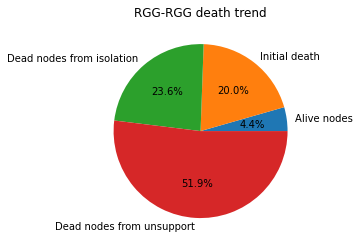

In [29]:
deaths = [alive[0], init_death, tot_isol[0], tot_unsupp[0]]

plt.pie(deaths, labels=labels, autopct='%.1f%%')
plt.title('RGG-RGG death trend')
plt.savefig('RGG_RGG death trend pie.png')
plt.show()

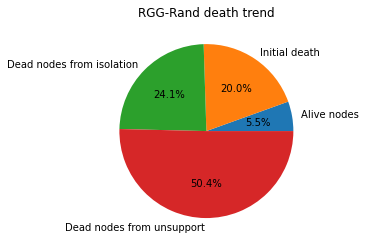

In [30]:
deaths = [alive[1], init_death, tot_isol[1], tot_unsupp[1]]

plt.pie(deaths, labels=labels, autopct='%.1f%%')
plt.title('RGG-Rand death trend')
plt.savefig('RGG_Rand death trend pie.png')
plt.show()

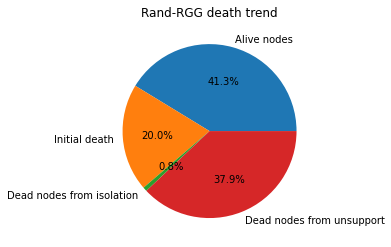

In [31]:
deaths = [alive[2], init_death, tot_isol[2], tot_unsupp[2]]

plt.pie(deaths, labels=labels, autopct='%.1f%%')
plt.title('Rand-RGG death trend')
plt.savefig('Rand_RGG death trend pie.png')
plt.show()

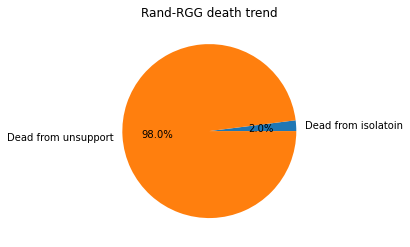

In [32]:
deaths = [tot_isol[2], tot_unsupp[2]]

plt.pie(deaths, labels=['Dead from isolatoin', 'Dead from unsupport'], autopct='%.1f%%')
plt.title('Rand-RGG death trend')
plt.savefig('Rand_RGG death trend pie_real deaths.png')
plt.show()

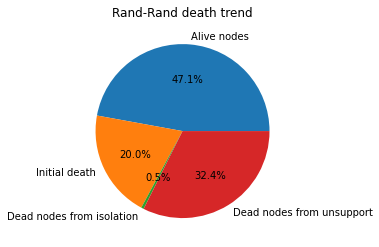

In [33]:
deaths = [alive[3], init_death, tot_isol[3], tot_unsupp[3]]

plt.pie(deaths, labels=labels, autopct='%.1f%%')
plt.title('Rand-Rand death trend')
plt.savefig('Rand_Rand death trend pie.png')
plt.show()

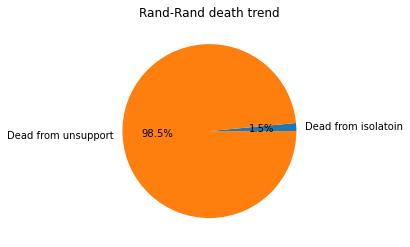

In [34]:
deaths = [tot_isol[3], tot_unsupp[3]]

plt.pie(deaths, labels=['Dead from isolatoin', 'Dead from unsupport'], autopct='%.1f%%')
plt.title('Rand-Rand death trend')
plt.savefig('Rand_Rand death trend pie_real deaths.png')
plt.show()

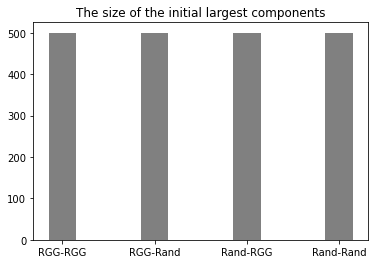

In [36]:
step_nums = []
step_nums.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['init_larg_comp'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['init_larg_comp'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['init_larg_comp'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['init_larg_comp'].values.tolist()))

index = np.arange(4)
graph_types = ['RGG-RGG', 'RGG-Rand', 'Rand-RGG', 'Rand-Rand']

plt.bar(index, step_nums, width=0.3, color='gray')
plt.xticks(index, graph_types)
plt.title('The size of the initial largest components')
plt.savefig('The size of the initial largest components.png')
plt.show()

## Compute the number of nodes

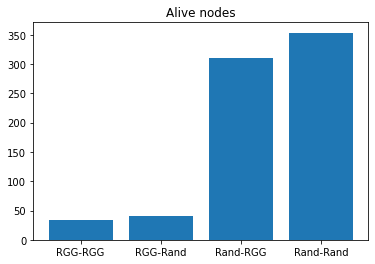

In [37]:
x_val = np.arange(4)
labels = ['initial', 'final']

plt.bar(x_val, alive)
plt.xticks(x_val, graph_types)
plt.title('Alive nodes')
plt.savefig('alive nodes.png')
plt.show()

## Compare the number of edges

In [38]:
init_intra = []
init_intra.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['init_intra_edge']))
init_intra.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['init_intra_edge']))
init_intra.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['init_intra_edge']))
init_intra.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['init_intra_edge']))

init_supp = []
init_supp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['init_supp_edge']))
init_supp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['init_supp_edge']))
init_supp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['init_supp_edge']))
init_supp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['init_supp_edge']))

fin_intra = []
fin_intra.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['fin_intra_edge']))
fin_intra.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['fin_intra_edge']))
fin_intra.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['fin_intra_edge']))
fin_intra.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['fin_intra_edge']))

fin_supp = []
fin_supp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['fin_supp_edge']))
fin_supp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['fin_supp_edge']))
fin_supp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['fin_supp_edge']))
fin_supp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['fin_supp_edge']))

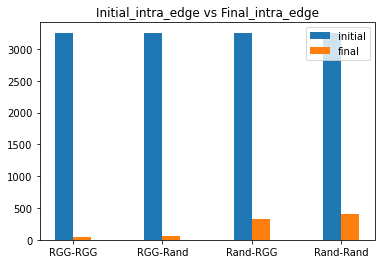

In [39]:
plt.bar(x_val-0.1, init_intra, width=0.2)
plt.bar(x_val+0.1, fin_intra, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_intra_edge vs Final_intra_edge')
plt.show()

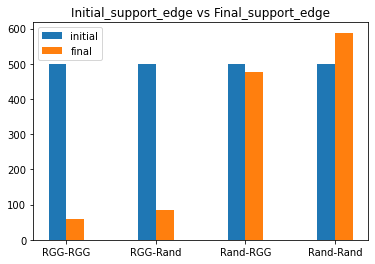

In [40]:
plt.bar(x_val-0.1, init_supp, width=0.2)
plt.bar(x_val+0.1, fin_supp, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_support_edge vs Final_support_edge')
plt.show()

## Network Analysis

In [41]:
alive_cases = []

rgg_rgg_alive = 0
rgg_rand_alive = 0
rand_rgg_alive = 0
rand_rand_alive = 0
for i in range(100):
    if buldy_RGG_200_rep100_095_rgg_rgg_data['alive_nodes'][i] != 0:
        rgg_rgg_alive += 1
    if buldy_RGG_200_rep100_095_rgg_rand_data['alive_nodes'][i] != 0:
        rgg_rand_alive += 1
    if buldy_RGG_200_rep100_095_rand_rgg_data['alive_nodes'][i] != 0:
        rand_rgg_alive += 1
    if buldy_RGG_200_rep100_095_rand_rand_data['alive_nodes'][i] != 0:
        rand_rand_alive += 1
        
alive_cases = [rgg_rgg_alive, rgg_rand_alive, rand_rgg_alive, rand_rand_alive]

In [42]:
alive_cases

[82, 68, 100, 100]

In [43]:
init_far = []
init_far.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['init_far_node']))
init_far.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['init_far_node']))
init_far.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['init_far_node']))
init_far.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['init_far_node']))

fin_far = []
fin_far.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['fin_far_node']))
fin_far.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['fin_far_node']))
fin_far.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['fin_far_node']))
fin_far.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['fin_far_node']))

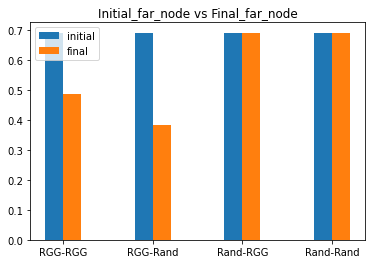

In [44]:
plt.bar(x_val-0.1, init_far, width=0.2)
plt.bar(x_val+0.1, fin_far, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_far_node vs Final_far_node')
plt.show()

In [45]:
init_clust = []
init_clust.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['init_clust']))
init_clust.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['init_clust']))
init_clust.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['init_clust']))
init_clust.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['init_clust']))

fin_clust = []
fin_clust.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['fin_clust']))
fin_clust.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['fin_clust']))
fin_clust.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['fin_clust']))
fin_clust.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['fin_clust']))

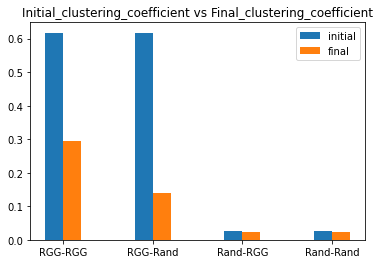

In [46]:
plt.bar(x_val-0.1, init_clust, width=0.2)
plt.bar(x_val+0.1, fin_clust, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_clustering_coefficient vs Final_clustering_coefficient')
plt.show()

In [47]:
init_mean_deg = []
init_mean_deg.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['init_mean_deg']))
init_mean_deg.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['init_mean_deg']))
init_mean_deg.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['init_mean_deg']))
init_mean_deg.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['init_mean_deg']))

fin_mean_deg = []
fin_mean_deg.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['fin_mean_deg']))
fin_mean_deg.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['fin_mean_deg']))
fin_mean_deg.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['fin_mean_deg']))
fin_mean_deg.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['fin_mean_deg']))

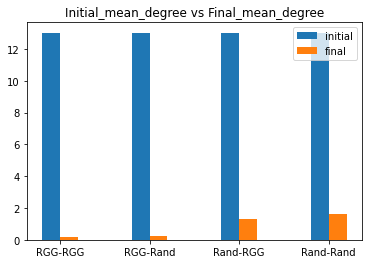

In [48]:
plt.bar(x_val-0.1, init_mean_deg, width=0.2)
plt.bar(x_val+0.1, fin_mean_deg, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_mean_degree vs Final_mean_degree')
plt.show()

In [49]:
init_larg_comp = []
init_larg_comp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['init_larg_comp']))
init_larg_comp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['init_larg_comp']))
init_larg_comp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['init_larg_comp']))
init_larg_comp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['init_larg_comp']))

fin_larg_comp = []
fin_larg_comp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['fin_larg_comp']))
fin_larg_comp.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['fin_larg_comp']))
fin_larg_comp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['fin_larg_comp']))
fin_larg_comp.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['fin_larg_comp']))

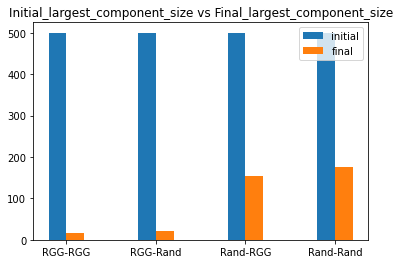

In [50]:
plt.bar(x_val-0.1, init_larg_comp, width=0.2)
plt.bar(x_val+0.1, fin_larg_comp, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_largest_component_size vs Final_largest_component_size')
plt.show()

In [52]:
deg_assort = []

a = buldy_RGG_200_rep100_095_rgg_rgg_data['deg_assort'].fillna(0)
b = buldy_RGG_200_rep100_095_rgg_rand_data['deg_assort'].fillna(0)
c = buldy_RGG_200_rep100_095_rand_rgg_data['deg_assort'].fillna(0)
d = buldy_RGG_200_rep100_095_rand_rand_data['deg_assort'].fillna(0)

deg_assort.append(statistics.mean(a))
deg_assort.append(statistics.mean(b))
deg_assort.append(statistics.mean(c))
deg_assort.append(statistics.mean(d))

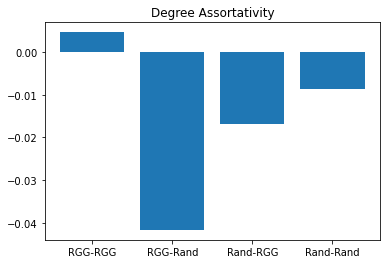

In [53]:
plt.bar(x_val, deg_assort)
plt.xticks(x_val, graph_types)
plt.title('Degree Assortativity')
plt.show()

In [54]:
dist_deg_cent = []
dist_deg_cent.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['dist_deg_cent']))
dist_deg_cent.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['dist_deg_cent']))
dist_deg_cent.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['dist_deg_cent']))
dist_deg_cent.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['dist_deg_cent']))

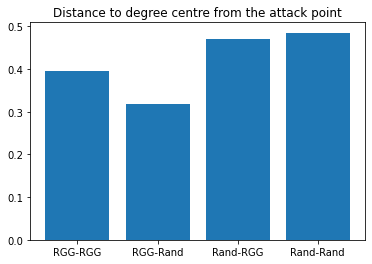

In [55]:
plt.bar(x_val, dist_deg_cent)
plt.xticks(x_val, graph_types)
plt.title('Distance to degree centre from the attack point')
plt.show()

In [56]:
dist_deg_cent = []
dist_deg_cent.append(sum(buldy_RGG_200_rep100_095_rgg_rgg_data['dist_deg_cent']) / alive_cases[0])
dist_deg_cent.append(sum(buldy_RGG_200_rep100_095_rgg_rand_data['dist_deg_cent']) / alive_cases[1])
dist_deg_cent.append(sum(buldy_RGG_200_rep100_095_rand_rgg_data['dist_deg_cent']) / alive_cases[2])
dist_deg_cent.append(sum(buldy_RGG_200_rep100_095_rand_rand_data['dist_deg_cent']) / alive_cases[3])

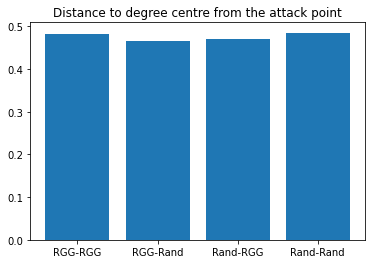

In [57]:
plt.bar(x_val, dist_deg_cent)
plt.xticks(x_val, graph_types)
plt.title('Distance to degree centre from the attack point')
plt.show()

In [58]:
dist_bet_cent = []
dist_bet_cent.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['dist_bet_cent']))
dist_bet_cent.append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['dist_bet_cent']))
dist_bet_cent.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['dist_bet_cent']))
dist_bet_cent.append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['dist_bet_cent']))

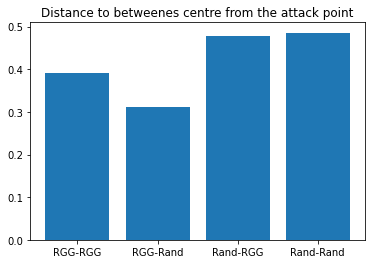

In [59]:
plt.bar(x_val, dist_bet_cent)
plt.xticks(x_val, graph_types)
plt.title('Distance to betweenes centre from the attack point')
plt.show()

In [60]:
dist_bet_cent = []
dist_bet_cent.append(sum(buldy_RGG_200_rep100_095_rgg_rgg_data['dist_bet_cent']) / alive_cases[0])
dist_bet_cent.append(sum(buldy_RGG_200_rep100_095_rgg_rand_data['dist_bet_cent']) / alive_cases[1])
dist_bet_cent.append(sum(buldy_RGG_200_rep100_095_rand_rgg_data['dist_bet_cent']) / alive_cases[2])
dist_bet_cent.append(sum(buldy_RGG_200_rep100_095_rand_rand_data['dist_bet_cent']) / alive_cases[3])

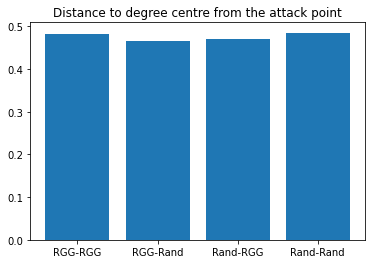

In [61]:
plt.bar(x_val, dist_deg_cent)
plt.xticks(x_val, graph_types)
plt.title('Distance to degree centre from the attack point')
plt.show()

In [62]:
len(buldy_RGG_200_rep100_095_rgg_rgg_data.columns)

87

In [ ]:
    for j in range(100):
        if buldy_RGG_200_rep100_0685_rgg_rgg_data['step%d_far_dead_node' % index][j] != 0:

            
    if i == 0:
        buldy_RGG_200_rep100_0685_far_dead_node['rgg_rgg'] = [statistics.mean(buldy_RGG_50_rep100_045_rgg_rgg_data['step%d_far_dead_node' % index].values.tolist())]
        buldy_RGG_200_rep100_0685_far_dead_node['rgg_rand'] = [statistics.mean(buldy_RGG_50_rep100_045_rgg_rand_data['step%d_far_dead_node' % index].values.tolist())]
        buldy_RGG_200_rep100_0685_far_dead_node['rand_rgg'] = [statistics.mean(buldy_RGG_50_rep100_045_rand_rgg_data['step%d_far_dead_node' % index].values.tolist())]
        buldy_RGG_200_rep100_0685_far_dead_node['rand_rand'] = [statistics.mean(buldy_RGG_50_rep100_045_rand_rand_data['step%d_far_dead_node' % index].values.tolist())]
    else:
        

In [65]:
buldy_RGG_200_rep100_095_far_dead_node = {'rgg_rgg': [],
                                           'rgg_rand': [],
                                           'rand_rgg': [],
                                           'rand_rand': []}
cum_far_dead_node = {'rgg_rgg': [],
                     'rgg_rand': [],
                     'rand_rgg': [],
                     'rand_rand': []}

for index in range(len(buldy_RGG_200_rep100_095_rgg_rgg_data.columns) - 65):
    buldy_RGG_200_rep100_095_far_dead_node['rgg_rgg'].append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rgg_data['step%d_far_dead_node' % (index+1)].values.tolist()))
    buldy_RGG_200_rep100_095_far_dead_node['rgg_rand'].append(statistics.mean(buldy_RGG_200_rep100_095_rgg_rand_data['step%d_far_dead_node' % (index+1)].values.tolist()))
    buldy_RGG_200_rep100_095_far_dead_node['rand_rgg'].append(statistics.mean(buldy_RGG_200_rep100_095_rand_rgg_data['step%d_far_dead_node' % (index+1)].values.tolist()))
    buldy_RGG_200_rep100_095_far_dead_node['rand_rand'].append(statistics.mean(buldy_RGG_200_rep100_095_rand_rand_data['step%d_far_dead_node' % (index+1)].values.tolist()))
        

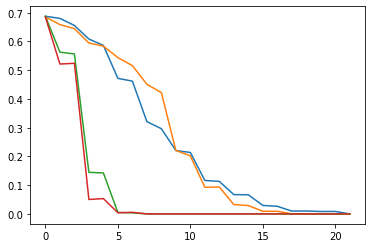

In [68]:
plt.plot(range(22), buldy_RGG_200_rep100_095_far_dead_node['rgg_rgg'])
plt.plot(range(22), buldy_RGG_200_rep100_095_far_dead_node['rgg_rand'])
plt.plot(range(22), buldy_RGG_200_rep100_095_far_dead_node['rand_rgg'])
plt.plot(range(22), buldy_RGG_200_rep100_095_far_dead_node['rand_rand'])

In [ ]:
cum_far_dead_node = {'rgg_rgg': [],
                     'rgg_rand': [],
                     'rand_rgg': [],
                     'rand_rand': []}

for index, row in buldy_RGG_50_rep100_045_rgg_rgg_data.iterrows():
    cur_row = row.tolist()
    
    length = int((len(buldy_RGG_50_rep100_045_rgg_rgg_data.columns) - 21) / 3)
    
    temp = []
    for i in range(length):
        if cur_row[(3*i) + 23] != 0:
            temp.append(cur_row[(3*i) + 23])
        else:
            temp.append(temp[i-2])
            
    cum_far_dead_node['rgg_rgg'].append(temp)
            
print(cum_far_dead_node['rgg_rgg'])